In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn 

In [2]:
data = pd.read_csv("./abalone.csv")

In [3]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
data.info

<bound method DataFrame.info of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.141

In [5]:
data.isna().sum()  

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

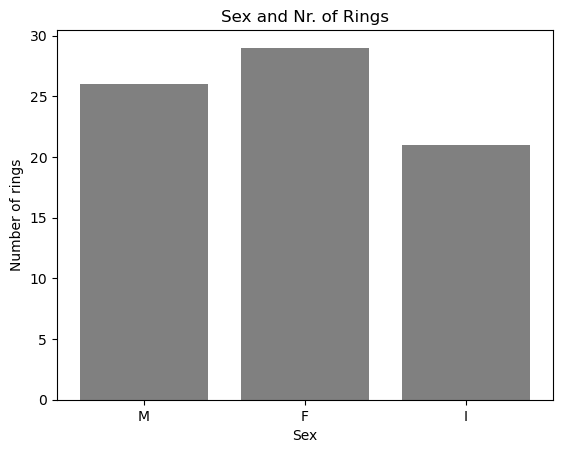

In [6]:
fig, ax = plt.subplots()

# Create bar plot of first 1000 data entries 
ax.bar(data["Sex"][:1000], data["Rings"][:1000], color="gray")

#Add legend: x is horizonatal axis, y is vertical
ax.set(title="Sex and Nr. of Rings", 
       xlabel="Sex",
       ylabel="Number of rings");

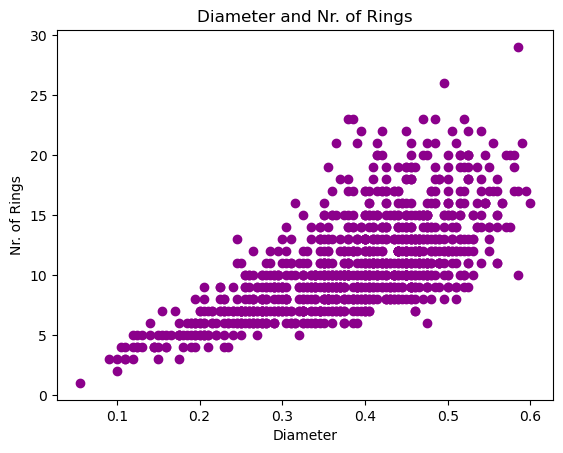

In [7]:
fig, ax = plt.subplots()

# Create a scatter plot with first 1000 data points
ax.scatter(data["Diameter"][:1000], data["Rings"][:1000], color="darkmagenta")

# Create a legend
ax.set(title="Diameter and Nr. of Rings",
       xlabel="Diameter",
       ylabel="Nr. of Rings");

In [10]:
#creating numerical data, checking no missing values 
# will add an Age column are the some important works before Data modeelling

#  categorical data to numerical is by using label encoding
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# instantiate LabelEncoder
l_encoder = LabelEncoder()

# transform data
data["Sex"] =  l_encoder.fit_transform(data["Sex"])

In [11]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
# to determine the age of the abalone molluscs based on the number of rings. We know that age is determined by the number of rings + 1.5.
# Add age column
data["Age"] = data["Rings"] + 1.5

# Drop rings column
data.drop("Rings", axis=1, inplace=True)

In [13]:
#Model

# Split data into X and y
#Split data into x (features) and y (target)
X = data.drop("Age", axis=1) #axis=1 means that we drop the entire column
y = data["Age"]

In [15]:
X


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [16]:
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

In [17]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #test_size=0.2 means that we use 20% of data for test set
                                                    random_state=14) #we choose a random number for random_state to make our results reproducable

In [18]:
len(X_train), len(y_train), len(X_test), len(y_test)

(3341, 3341, 836, 836)

In [36]:
from sklearn.ensemble import RandomForestRegressor

# instantiate model
rf = RandomForestRegressor(n_estimators=200, #n_jobs=-1 means that we are using all computer power to fit the model
                           random_state=14,max_features=10)

# fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=10, n_estimators=200, random_state=14)

In [38]:
# import the evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

# create an evaluation function
def show_score(model):
  train_preds= model.predict(X_train)
  test_preds = model.predict(X_test)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Test MAE": mean_absolute_error(y_test, test_preds),
            "Training MSE": mean_squared_log_error(y_train, train_preds),
            "Test MSE": mean_squared_log_error(y_test, test_preds),
            "Training RMSE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
            "Test RMSE": np.sqrt(mean_squared_log_error(y_test, test_preds)),
            "Training R2": r2_score(y_train, train_preds),
            "Test R2": r2_score(y_test, test_preds)}
  return scores

In [40]:
# fit the model again
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=10, n_estimators=200, random_state=14)

In [41]:
show_score(rf)

{'Training MAE': 0.5762376533971865,
 'Test MAE': 1.5001734449760766,
 'Training MSE': 0.003339503192216813,
 'Test MSE': 0.023761868681897478,
 'Training RMSE': 0.05778843476178268,
 'Test RMSE': 0.1541488523534881,
 'Training R2': 0.9369959893145654,
 'Test R2': 0.5328335104000432}

In [42]:
rf.score(X_test,y_test)*100

53.28335104000432

In [43]:
# Parameter tuning 
#Using randomsearchgrid
#Check current parameters
from pprint import pprint

print("Current parameters:")
pprint(rf.get_params())

Current parameters:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 10,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 14,
 'verbose': 0,
 'warm_start': False}


In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":[20, 100, 200],
           "max_depth":[None, 1, 2, 5],
           "max_features":[0.5, 1, "auto", "sqrt"],
           "min_samples_split":[ 2, 5, 10],
           "min_samples_leaf":[1, 2, 3, 5]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=14),
                              param_distributions=rf_grid, 
                              n_iter=100, # n_iter = 100 means that the model will fit 100 for different combinations of parameters
                              cv=5, # number of cross-validation folds for each set of parameters
                              verbose=True) # requesting more elaborate output in the log

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=14),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 1, 2, 5],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 100, 200]},
                   verbose=True)

In [49]:
rs_model.score(X_test,y_test)*100

56.07174360229722

In [50]:
rf.score(X_test,y_test)*100

53.28335104000432